In [2]:
#import plotting modules 
import matplotlib.pyplot as plt
import numpy as np


#Set the parent folder AI II FINAL CODE as main path 
try: 
    import os
    if str(os.getcwd())[-16:] != "AI II FINAL CODE": 
        os.chdir('../../AI II FINAL CODE/')
except:
    pass 

In [3]:
#Run the devicedataloader2 file
%run CurrentCode/DeviceDataLoader2.ipynb 

Using device: cuda


In [4]:
#Load the pickle objects produced from the experiments
opt_hist_data_load = loadObject('Results/Experiment2_pkl')
hist_data_load = loadObject('Results/Experiment1_pkl')

a = 0

hist_data = hist_data_load[a:]

opt_hist_data = opt_hist_data_load[a:]

Time: 0.00802 s

Time: 0.00720 s



In [5]:
len(opt_hist_data[0])

5

In [6]:
#Activation function labels 
actFuncList_str = ['relu', 'gelu', 'squareplus', 'softplus','erfrelu', 'erfplus'] 

trials = len(hist_data)

epochs = 25 

print(trials)

50


In [7]:
c = 1

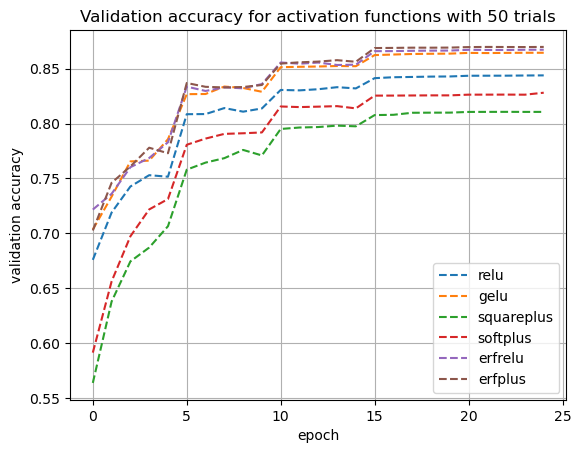

In [8]:
#For each activation function, plot the average validation accuracy of the trials at each epoch 
for ii in range(len(actFuncList_str)):
    Score_matrix = np.zeros((trials, epochs))
    for jj in range(trials): 
        accuracies = [x['val_acc'] for x in hist_data[jj][ii]]
        
        Score_matrix[jj, :] = accuracies
        
    plt.plot(np.mean(Score_matrix, axis=0), linestyle='dashed', label=actFuncList_str[ii])
    
if c == 0:
    for ii in range(len(actFuncList_str)-1):
        Score_matrix = np.zeros((trials, epochs))
        for jj in range(trials): 
            accuracies = [x['val_acc'] for x in opt_hist_data[jj][ii]]
            
            Score_matrix[jj, :] = accuracies
            
        plt.plot(np.mean(Score_matrix, axis=0), '-', label="Opt" + actFuncList_str[1+ii])
    
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.grid()
plt.title(f'Validation accuracy for activation functions with {trials} trials');

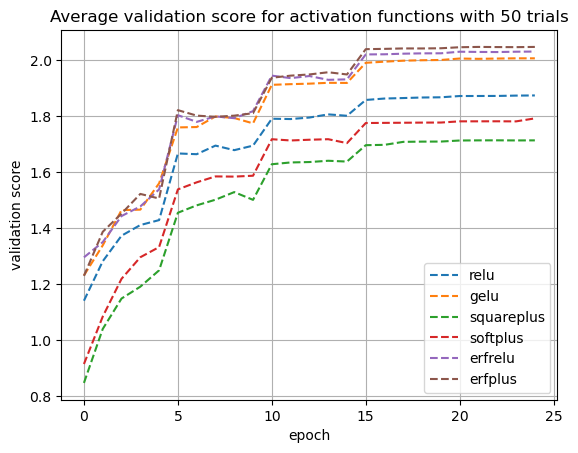

In [9]:
#For each activation function, plot the average validation score of the trials at each epoch 
#The score function allows one to compare models with accuracy closer to each other. expects input from [0, 1] and sends it to [0, inf] 
for ii in range(len(actFuncList_str)):
    Score_matrix = np.zeros((trials, epochs))
    for jj in range(trials): 
        accuracies = [x['val_acc'] for x in hist_data[jj][ii]]
        
        score = -np.log(1-np.array(accuracies))
        
        Score_matrix[jj, :] = score 
        
    plt.plot(np.mean(Score_matrix, axis=0), linestyle='dashed', label=actFuncList_str[ii])
    # Plot the time series data with error bars

if c == 0:
    for ii in range(len(actFuncList_str)-1):
        Score_matrix = np.zeros((trials, epochs))
        for jj in range(trials): 
            accuracies = [x['val_acc'] for x in opt_hist_data[jj][ii]]
            
            score = -np.log(1-np.array(accuracies))
            
            Score_matrix[jj, :] = score 
            
        plt.plot(np.mean(Score_matrix, axis=0), '-', label="Opt" + actFuncList_str[1+ii])

plt.xlabel('epoch')
plt.ylabel('validation score')
plt.legend()
plt.grid()
plt.title(f'Average validation score for activation functions with {trials} trials');

range(1, 7) ['relu', 'gelu', 'squareplus', 'softplus', 'erfrelu', 'erfplus']


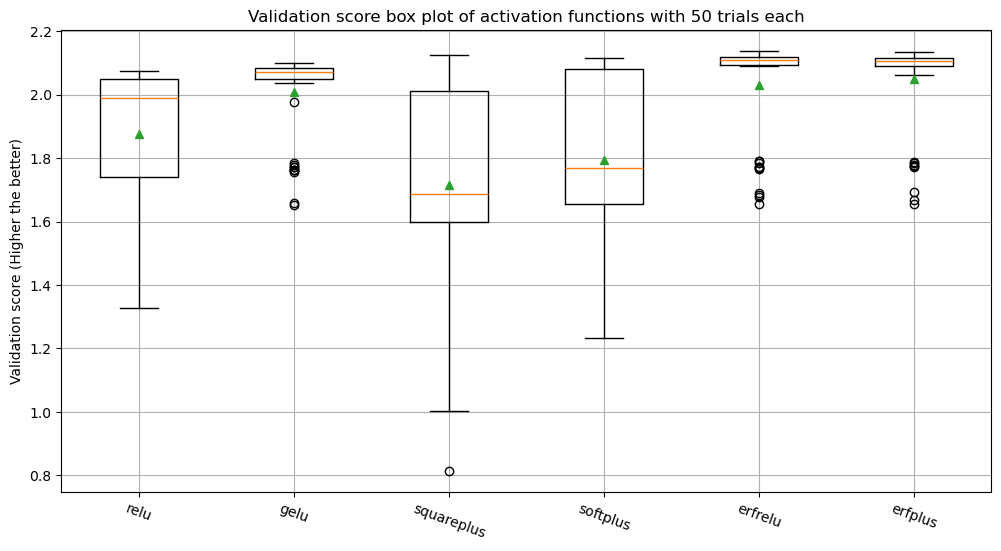

In [34]:
#For each actiavtion function, plot the final scores (final epoch) of the different trials as boxplots  
c = 1

if c == 0:
    Final_score = np.zeros((2*len(actFuncList_str)-1, trials))
else: 
    Final_score = np.zeros((len(actFuncList_str), trials))

for ii in range(len(actFuncList_str)):
    for jj in range(trials): 
        accuracies = [x['val_acc'] for x in hist_data[jj][ii]]
        Final_score[ii, jj] = -np.log(1-accuracies[-1])

if c == 0:
    for ii in range(len(actFuncList_str)-1):
        for jj in range(trials): 
            accuracies = [x['val_acc'] for x in opt_hist_data[jj][ii]]
            Final_score[ii+len(actFuncList_str), jj] = -np.log(1-accuracies[-1])
        

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create the box plots
plt.boxplot(Final_score.T, vert=True, showmeans=True)

# Set the title and labels
plt.title(f'Validation score box plot of activation functions with {trials} trials each')
plt.ylabel("Validation score (Higher the better)")

# Update the x-ticks with the provided labels
if c == 0:
    labels = actFuncList_str + ["opt_"+x for x in actFuncList_str[1:]]
else: 
    labels = actFuncList_str
    
print(range(1, len(labels) + 1), labels)

plt.xticks(range(1, len(labels) + 1), labels, rotation=-20)

plt.grid()
plt.show()

In [29]:
print("Final score values")
print('----------------------')
print(f"{("Act Func"):<10}: {("median "):<6} | {("max  "):<7} | {("mean"):<7} | {("std"):<6}")
for ii in range(len(labels)):
    print(f"{(labels[ii]):<10}: {(np.median(Final_score[ii, :])):.5f} | {(np.max(Final_score[ii, :])):.5f} | {(np.mean(Final_score[ii, :])):.5f} | {(np.std(Final_score[ii, :])):.5f}")

Final score values
----------------------
Act Func  : median  | max     | mean    | std   
relu      : 1.98937 | 2.07627 | 1.87516 | 0.18819
gelu      : 2.07171 | 2.10075 | 2.00775 | 0.13377
squareplus: 1.68813 | 2.12526 | 1.71469 | 0.30866
softplus  : 1.76773 | 2.11650 | 1.79321 | 0.25346
erfrelu   : 2.10933 | 2.13757 | 2.03190 | 0.15684
erfplus   : 2.10569 | 2.13626 | 2.04845 | 0.13697


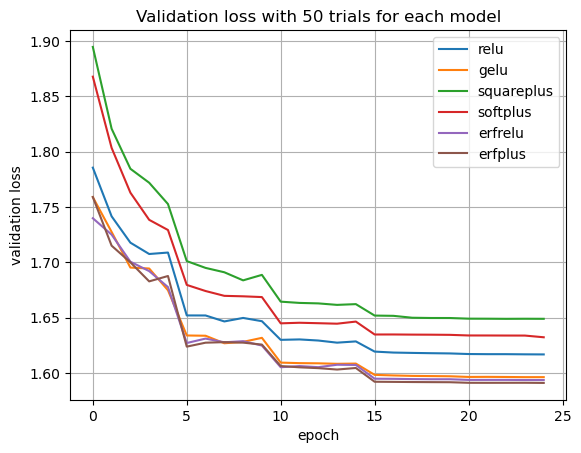

In [12]:
for ii in range(len(actFuncList_str)):
    loss_matrix = np.zeros((trials, epochs))
    for jj in range(trials): 
        loss = [x['val_loss'] for x in hist_data[jj][ii]]
        
        loss_matrix[jj, :] = loss
        
    plt.plot(np.mean(loss_matrix, axis=0), '-', label=actFuncList_str[ii])
    
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.legend()
plt.grid()
plt.title(f'Validation loss with {trials} trials for each model');

In [13]:
layers_data_load = loadObject('Results/Experiment3_pkl')

layers = [1, 2, 3, 5, 10, 20, 30, 50, 75, 100]

exp3_trials = 10 

Time: 0.01059 s



In [14]:
len(layers_data_load[0][0])

6

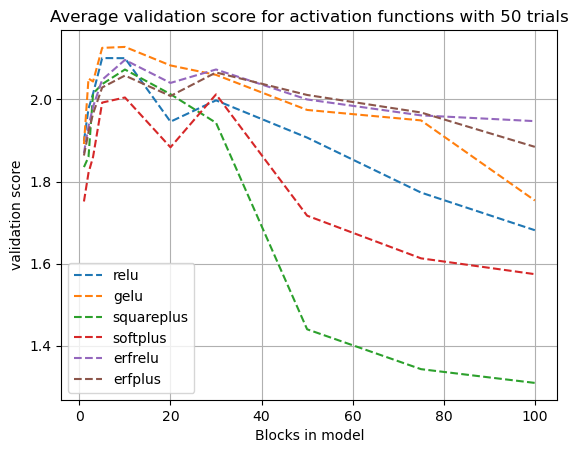

In [31]:
Score_matrix = np.zeros((len(actFuncList_str), len(layers)))

for ii in range(len(layers)):
    for kk in range(len(actFuncList_str)):
        scores = [] 
        for jj in range(exp3_trials): 
            accuracies = [x['val_acc'] for x in layers_data_load[ii][jj][kk]]
            
            scores.append(-np.log(1-accuracies[-1]))
            
        Score_matrix[kk, ii] = np.mean(scores)
        
for kk in range(len(actFuncList_str)): 
    plt.plot(layers, Score_matrix[kk, :], linestyle='dashed', label=actFuncList_str[kk])
    # Plot the time series data with error bars

plt.xlabel('Blocks in model')
plt.ylabel('validation score')
plt.legend()
plt.grid()
#plt.xticks(np.arange(0, 10), layers)
plt.title(f'Average validation score for activation functions with {trials} trials');